# TASK - 1 IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. 

Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here(https://www.kaggle.com/datasets/saurabh00007/iriscsv) for the task of iris flower classification with Machine Learning.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# BASIC UNDERSTANDING OF DATA

1. CHECKING SHAPE(DIMENSION) OF DATA 

In [5]:
df.shape

(150, 6)

2. CHECKING DATATYPE OF DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


3. DESCRIBEING DATA

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


4. CHECKING THE NULL VALUES OF DATA

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop(columns='Id',inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


5. CHECKING DUPLICATE VALUE IN DATA

In [11]:
df.duplicated().sum()

3

# EXPLORATORY DATA ANALYSIS

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1. Distribution of species

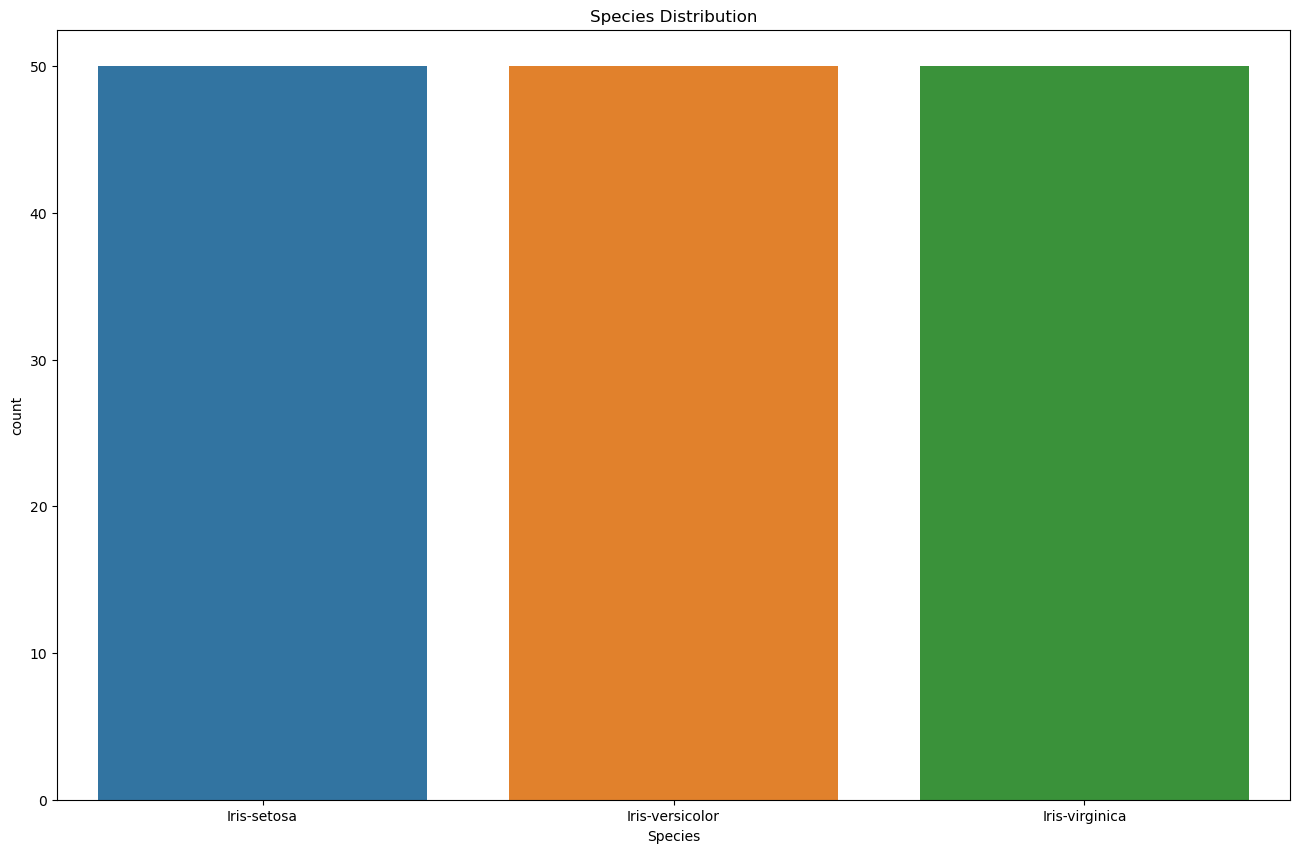

In [13]:
plt.figure(figsize=(35,10))
plt.subplot(1,2,1)
sns.countplot(x='Species',data=df)
plt.title("Species Distribution")
plt.show()

# Observation

* We can observe that all the species are having equal records.

<Axes: title={'center': 'Species VS Sepal Width'}, xlabel='Species', ylabel='SepalWidthCm'>

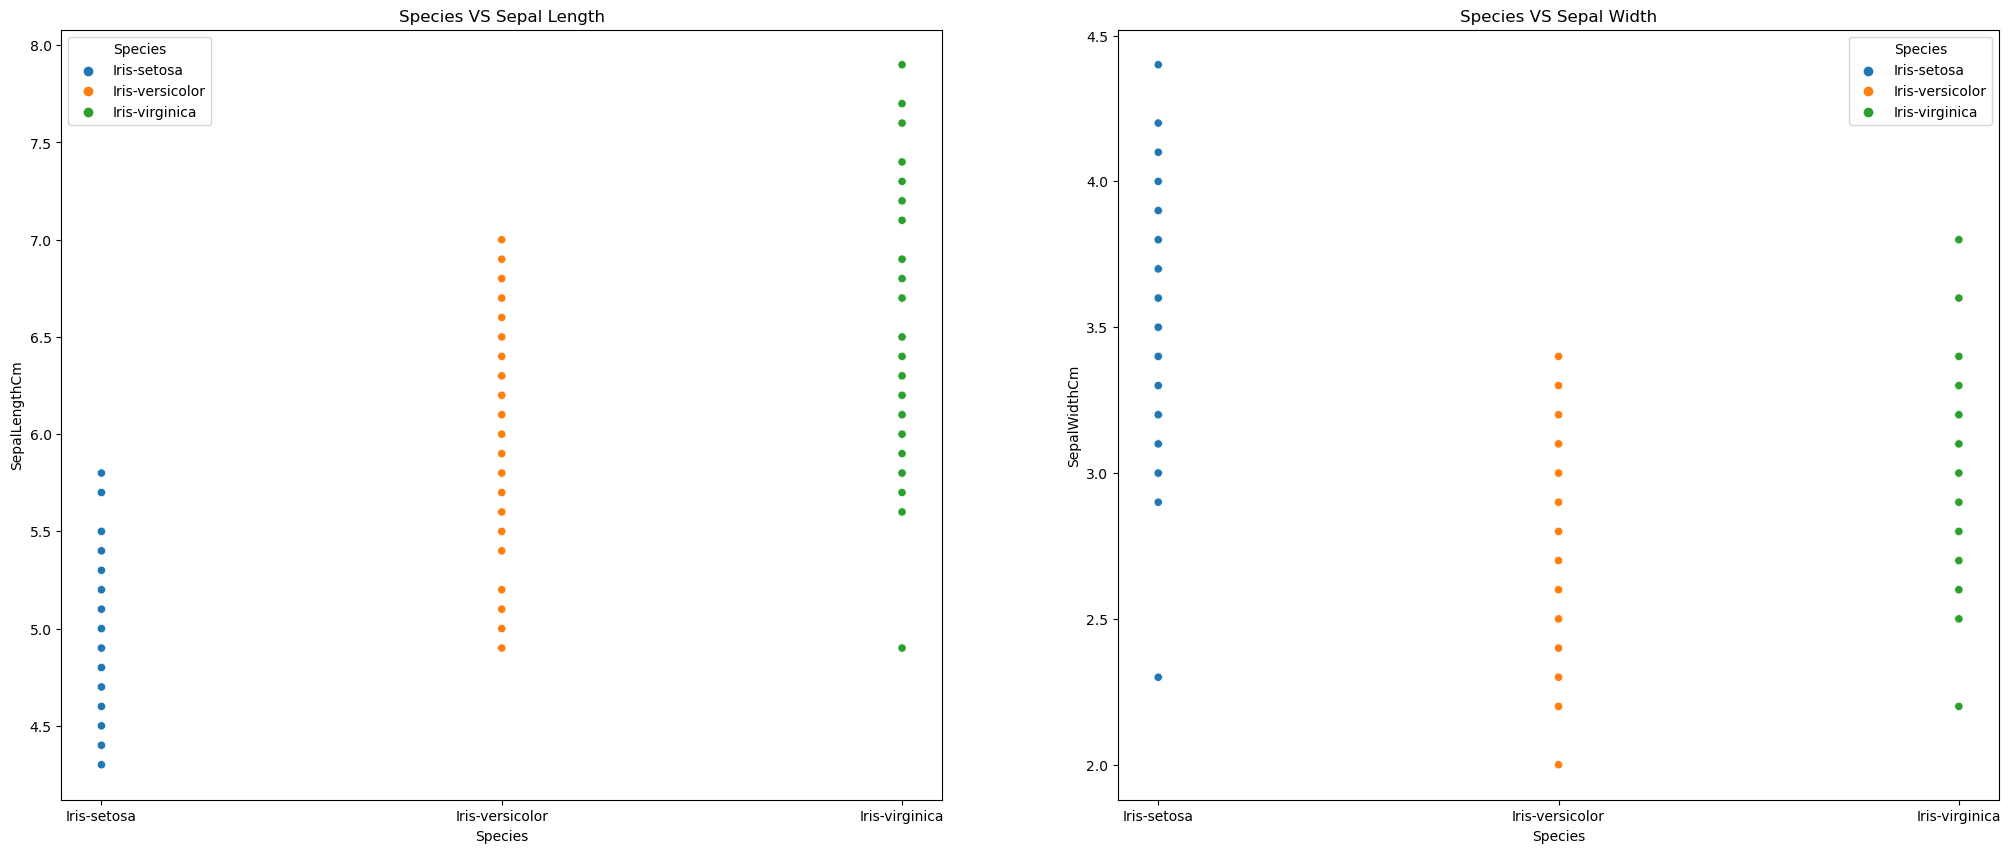

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Species VS Sepal Length")
sns.scatterplot(x="Species",y="SepalLengthCm",data=df,hue="Species")
plt.subplot(1,2,2)
plt.title("Species VS Sepal Width")
sns.scatterplot(x="Species",y="SepalWidthCm",data=df,hue="Species")

<Axes: title={'center': 'Species VS Petal Width'}, xlabel='Species', ylabel='PetalWidthCm'>

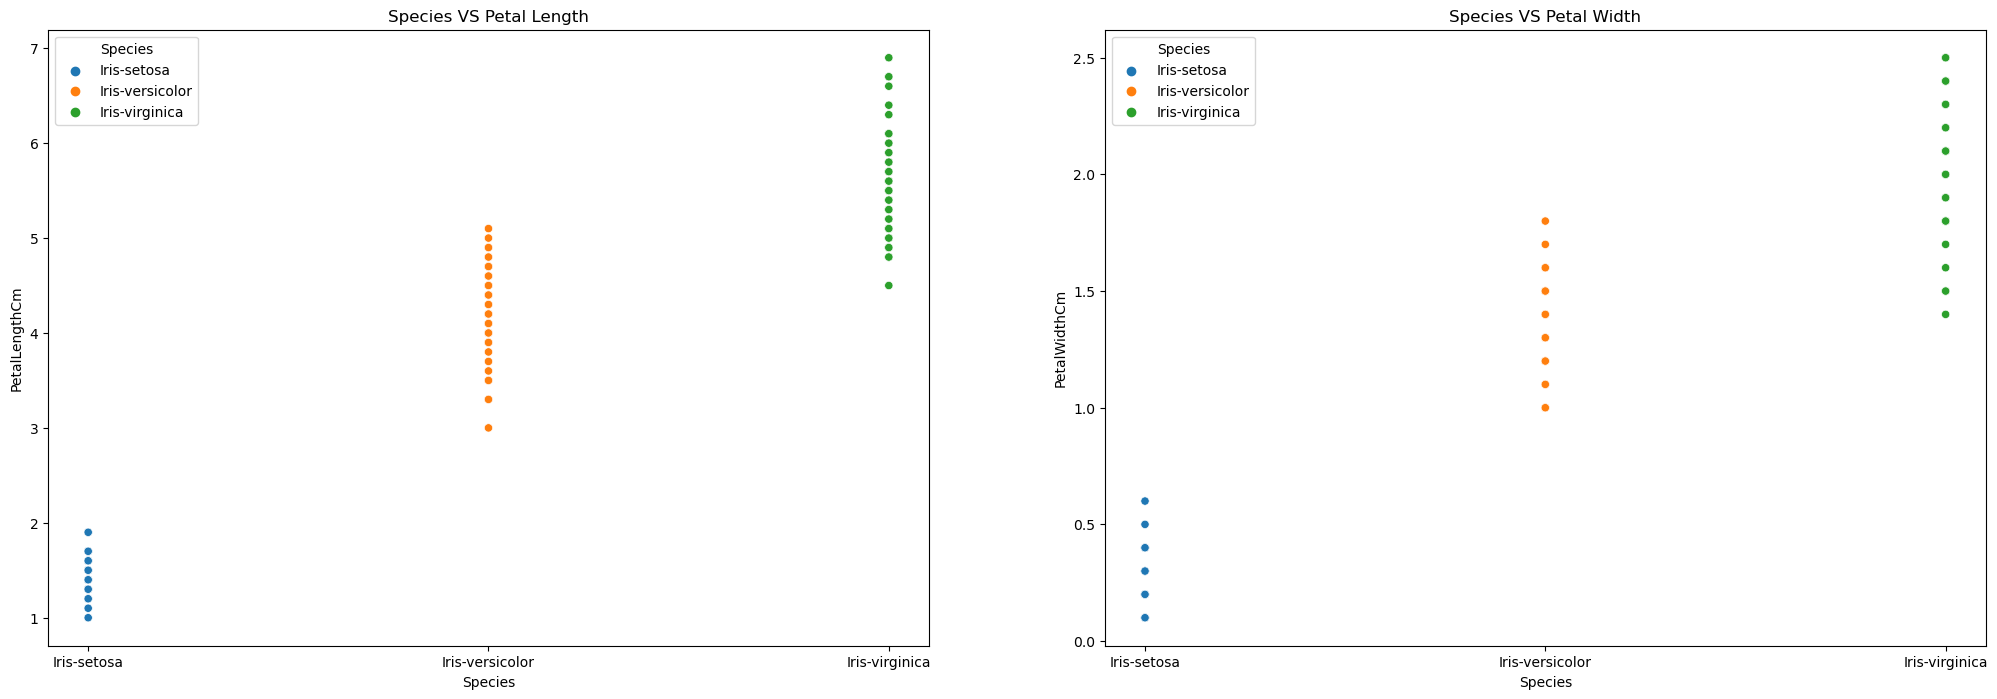

In [17]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.title("Species VS Petal Length")
sns.scatterplot(x ='Species',y='PetalLengthCm',data=df, hue='Species')

plt.subplot(1,2,2)
plt.title("Species VS Petal Width")
sns.scatterplot(x='Species',y='PetalWidthCm',data=df, hue='Species')

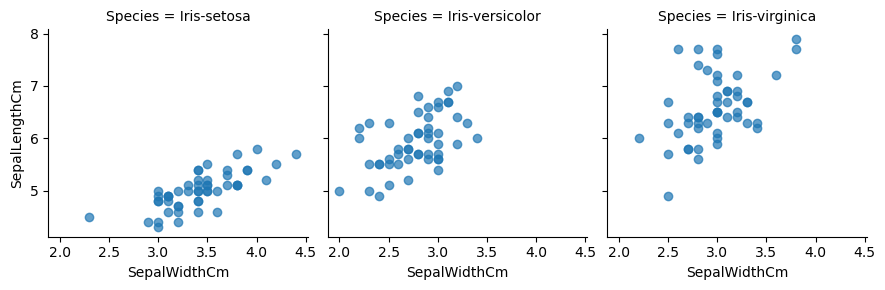

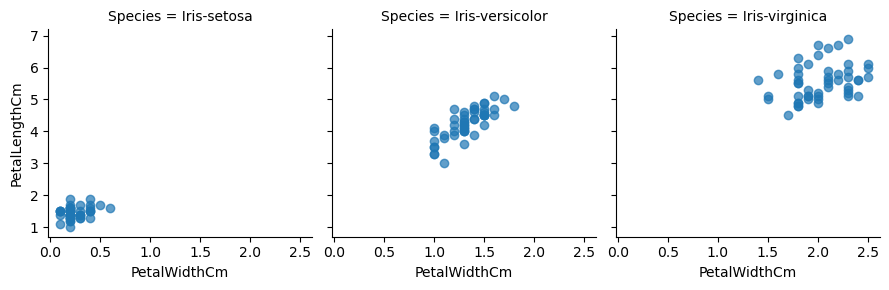

In [18]:
sepal = sns.FacetGrid(df,col='Species')
sepal.map(plt.scatter,'SepalWidthCm','SepalLengthCm',alpha=0.7)
petal = sns.FacetGrid(df,col='Species')
petal.map(plt.scatter,'PetalWidthCm','PetalLengthCm',alpha=0.7)

# Data Preprocessing

Selecting Target and features labels for model

In [19]:
x=df.drop(columns='Species')
y=df['Species']

In [20]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Splitting of x & y for model training and testing

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [24]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [25]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

In [26]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

# Model Building

In [27]:
Lr=LogisticRegression()

In [30]:
Lr.fit(x_train,y_train)

LogisticRegression()

# Model prediction

In [31]:
y_pred_train=Lr.predict(x_train)

In [32]:
y_pred_test=Lr.predict(x_test)

# Model Accuracy

In [33]:
print("Accuraacy on Training Data is: ",accuracy_score(y_train,y_pred_train)*100)

Accuraacy on Training Data is:  97.5


In [34]:
print("Accuraacy on Training Data is: ",accuracy_score(y_test,y_pred_test)*100)

Accuraacy on Training Data is:  100.0


# Obseravtion

* We can clearly observe that we got an accuracy of 97 on training data and 100 on testing data.
* So we can say that our model is having a kind of best fitting.

# Model Evaluation

In [35]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

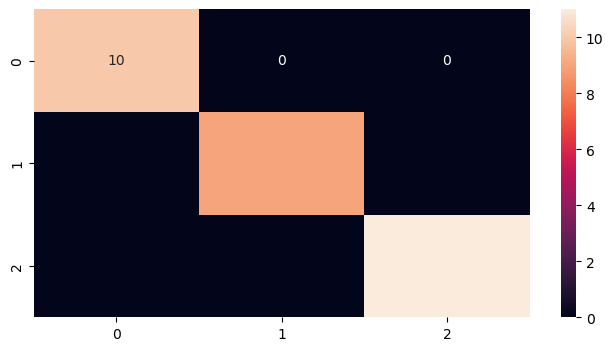

In [36]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g")
plt.show()

# Conclusion:-

* Base on the results, the highest accuracy that we got is 100% accuracy from LogisticRegression model.

In [37]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
# Here is a sample prediction if a new value is entered.
X_new = pd.DataFrame(np.array([[5.8,3.5,1.4,0.4],[6.9,3.0,4.8,1.7],[7.6,3.0,6.6,2.5]]),columns=list(x.columns))

# new dataset to be predicted
X_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.8,3.5,1.4,0.4
1,6.9,3.0,4.8,1.7
2,7.6,3.0,6.6,2.5


In [39]:
# new species prediction result
X_new['species'] = Lr.predict(X_new)
X_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.8,3.5,1.4,0.4,Iris-setosa
1,6.9,3.0,4.8,1.7,Iris-versicolor
2,7.6,3.0,6.6,2.5,Iris-virginica
